In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('Boston.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         506 non-null    float64
 1   ZN           506 non-null    float64
 2   INDUS        506 non-null    float64
 3   CHAS         506 non-null    int64  
 4   NOX          506 non-null    float64
 5   RM           506 non-null    float64
 6   AGE          506 non-null    float64
 7   DIS          506 non-null    float64
 8   RAD          506 non-null    int64  
 9   TAX          506 non-null    int64  
 10  PTRATIO      506 non-null    float64
 11  B            506 non-null    float64
 12  LSTAT        506 non-null    float64
 13  MEDV         506 non-null    float64
 14  CAT. MEDV    506 non-null    int64  
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
dtypes: float64(13), int64(4)
memory usage: 67.3 KB


In [ ]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,Unnamed: 15,Unnamed: 16
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,0.0,0.0
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,0.166008,NaN,NaN
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.372456,NaN,NaN
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000,NaN,NaN
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,0.000000,NaN,NaN
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,0.000000,NaN,NaN
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,0.000000,NaN,NaN
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000,NaN,NaN


In [ ]:
df = df.drop(columns=["CAT. MEDV", "Unnamed: 15", "Unnamed: 16"], errors='ignore') #"If the column doesn’t exist, don’t throw an error, just skip it."


In [ ]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
X=df.drop('MEDV',axis=1) #axis=1, you are telling Pandas to work column-wise.
y=df['MEDV']

#X: Would contain all columns except 'MEDV':

#X = df.drop("MEDV", axis=1)

#This would be a DataFrame with columns: 'CRIM', 'ZN', 'INDUS', 'RM', 'LSTAT', etc.

#y: Would contain just the 'MEDV' column (the target you want to predict):

#y = df["MEDV"]

#This would be a Series containing values like 24.0, 21.6, 34.7, etc.

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential() #nitializes a Sequential model, which means the model is a linear stack of layers, where you add layers one by one.
model.add(Dense(64,input_dim=X_train.shape[1],activation='relu')) #64 neurons (the number of units in this layer).

#input_dim=X_train.shape[1]: The number of input features (i.e., the number of columns in X_train). X_train.shape[1] dynamically gets the number of features in the training data.
#activation='relu': The ReLU (Rectified Linear Unit) activation function is applied to each neuron. It introduces non-linearity to the model and helps with learning complex patterns.

model.add(Dense(32,activation='relu')) #Adds the second hidden layer with:

#32 neurons.
#activation='relu': The ReLU activation function is applied here as well.

model.add(Dense(1)) #1 neuron, since you are performing linear regression (predicting a continuous value).

#No activation function is specified (which defaults to a linear activation), as in linear regression the output is a continuous value (the predicted house price).

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

model.summary()
 #Adam (short for Adaptive Moment Estimation) is a popular optimization algorithm.

#It combines the advantages of two other optimizers: AdaGrad and RMSProp.

#Adam adjusts the learning rate during training, making it efficient for training deep neural networks.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(X_train_scaled,y_train,validation_split=0.1,epochs=100,batch_size=10)

#X_train_scaled:
#Input features for training (after scaling/normalization).

#Neural networks generally perform better when inputs are normalized (e.g., using StandardScaler or MinMaxScaler).

#y_train:

#Target values (house prices) for training.

#validation_split=0.1:

#Reserves 10% of the training data as validation data (used to monitor model performance on unseen data during training).

#Helps detect overfitting.

#epochs=100:

#The number of times the model will go through the entire training dataset.

#More epochs allow the model to learn better but increase training time and risk of overfitting.

#batch_size=10:

#Number of samples processed before the model updates weights.

#Small batch size (like 10) can help in better generalization but increases training time.'''

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 5.3703 - mae: 1.5841 - val_loss: 17.2677 - val_mae: 2.9910
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8235 - mae: 1.6177 - val_loss: 16.0337 - val_mae: 2.9091
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.5685 - mae: 1.6694 - val_loss: 15.7546 - val_mae: 2.8874
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.6617 - mae: 1.6623 - val_loss: 16.6749 - val_mae: 2.9588
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.8819 - mae: 1.7085 - val_loss: 17.8000 - val_mae: 2.9962
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6506 - mae: 1.6493 - val_loss: 15.5547 - val_mae: 2.8845
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8699 - mae: 1.6360 - val_loss: 15.2449 - val_mae: 2.8306
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.5394 - mae: 1.6411 - val_loss: 15.5705 - val_mae: 2.7932
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - lo

In [ ]:
output=model.evaluate(X_test_scaled,y_test)

#X_test_scaled: Test input features (scaled, just like your training data).

#y_test: True output values (actual house prices).

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 16.0897 - mae: 3.0421 


In [ ]:
print(f"Mean Squared Error: {output[0]}"
      ,f"Mean Absolute Error: {output[1]}",sep="\n")

Mean Squared Error: 19.14495277404785
Mean Absolute Error: 3.1408653259277344


In [ ]:
y_pred=model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


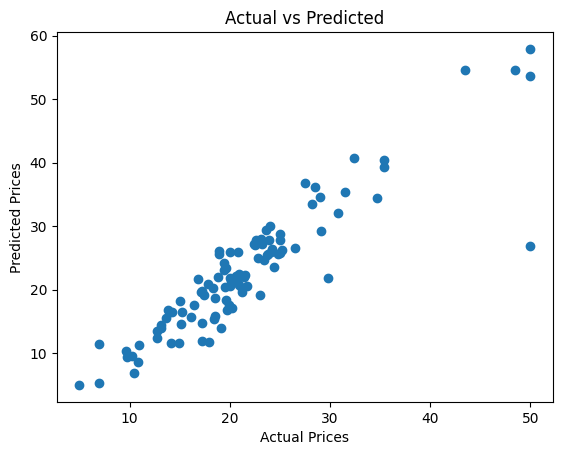

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted")
plt.show()